# **Quem domina o YouTube em 2025? Uma análise dos Top 100 vídeos musicais!**

In [2]:
# Instalações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from ydata_profiling import ProfileReport

sns.set(style='whitegrid', rc={'figure.dpi':100})
pd.set_option('display.max_colwidth', 200)


df = pd.read_csv(r'd:/Python/top_youtube/youtube-top-100-analysis/data/youtube_top_100_songs_2025.csv')
profile = ProfileReport(df, title="Profiling Report")

df.head()


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: https://rosesarerosie.lnk.to/APTID\n\nOrder APT. single CD: https://rosesarerosie.lnk.to/APT-CDID\n\n'rosie' - the first studio album by ROSÉ - out now\...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블핑;로제;Rosé;BLINK;블링크;bruno mars;APT.;apt;apartment game;meet me at the;meet me at the apt;bruno mars rose apt;rose;rosesarerosie;rose apt;rose apt musi...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxresdefault.webp,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3WVsv__Rn1g,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)","Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)","MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListen to “Die With A Smile”, song and video out now: http://GagaMars.lnk.to/DieWithASmile \n \nDirected by Daniel Ramos & Bruno Mars\n \nFollow Lady Gaga:...",1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefault.jpg,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIaykMOkzqHtBQ,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Video),Reneé Rapp - Leave Me Alone (Official Music Video),"Listen to “BITE ME”, the new album from Reneé Rapp, out now: http://ReneeRapp.lnk.to/BITEME \n\nGet tickets to the BITE ME TOUR: http://reneerapp.com/tour \n \nFollow Reneé Rapp:\nTikTok: https://...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefault.jpg,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9LdJ1TgQy6Q,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official Music Video),Billie Eilish - BIRDS OF A FEATHER (Official Music Video),Listen to HIT ME HARD AND SOFT: https://billieeilish.lnk.to/HITMEHARDANDSOFT \nDownload BIRDS OF A FEATHER Live from Billie’s Amazon Music Songline performance: https://billieeilish.lnk.to/BIRDSOF...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alternative,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefault.jpg,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXok597xYo8cg,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé Rapp, out now: http://ReneeRapp.lnk.to/BITEME \n\nGet tickets to the BITE ME Tour: http://reneerapp.com/tour\n\nFollow Reneé Rapp:\nTikTok: https://ww...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefault.jpg,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9LdJ1TgQy6Q,408000


In [32]:
# Verificando os dados

print(df.columns)
print('\n')
duplicados = df.duplicated().sum()
print(f'Valores duplicados: {duplicados}')

Index(['title', 'fulltitle', 'description', 'view_count', 'categories', 'tags',
       'duration', 'duration_string', 'live_status', 'thumbnail', 'channel',
       'channel_url', 'channel_follower_count'],
      dtype='object')


Valores duplicados: 0


In [ ]:
# Verificando valores nulos

df['tags'] = df['tags'].fillna('Sem tags')
print(df.isnull().sum())
print('\n')
print('Valores nulos substituídos')


title                     0
fulltitle                 0
description               0
view_count                0
categories                0
tags                      0
duration                  0
duration_string           0
live_status               0
thumbnail                 0
channel                   0
channel_url               0
channel_follower_count    0
dtype: int64


Valores nulos substituídos


In [ ]:
# Estatítiscas do dataset

isplay(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,100,100,ROSÉ & Bruno Mars - APT. (Official Music Video),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fulltitle,100,100,ROSÉ & Bruno Mars - APT. (Official Music Video),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,100,100,ROSÉ & Bruno Mars - APT.\nDownload/stream: https://rosesarerosie.lnk.to/APTID\n\nOrder APT. single CD: https://rosesarerosie.lnk.to/APT-CDID\n\n'rosie' - the first studio album by ROSÉ - out now\...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view_count,100.0,NaN,NaN,NaN,105910319.07,249113166.097159,1161.0,18527021.0,37982240.0,111107258.5,2009014557.0
categories,100,2,Music,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,100,77,Sem tags,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,100.0,NaN,NaN,NaN,203.9,44.260592,120.0,173.0,193.5,231.75,354.0
duration_string,100,69,4:12,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
live_status,100,1,False,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thumbnail,100,100,https://i.ytimg.com/vi_webp/ekr2nIex040/maxresdefault.webp,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dominância no YouTube: Top Artistas/Canais

coluna_visualizacoes = 'view_count'
coluna_canal = 'channel'

print("\nTOP 5 CANAIS POR TOTAL DE VISUALIZAÇÕES")

dominancia = df.groupby(coluna_canal)[coluna_visualizacoes].sum()
top_canais = dominancia.sort_values(ascending=False).head(5)

top_canais_df = top_canais.reset_index()
top_canais_df.columns = ['Canal', 'Total de Visualizações']

print(top_canais_df.to_string(index=False))



TOP 5 CANAIS POR TOTAL DE VISUALIZAÇÕES
            Canal  Total de Visualizações
             ROSÉ              2240541280
        Lady Gaga              1562032073
Sabrina Carpenter              1117474778
    Billie Eilish               747239602
   Kendrick Lamar               610278219


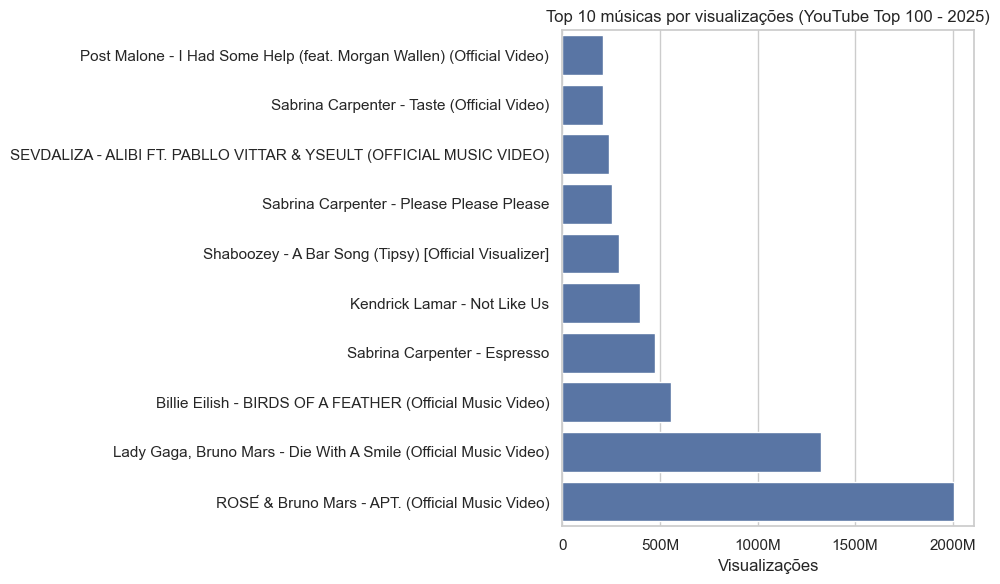

In [6]:
# Top 10 músicas mais vistas

top10 = df.nlargest(10, 'view_count').sort_values('view_count')
plt.figure(figsize=(10,6))
sns.barplot(x='view_count', y='title', data=top10, orient='h')
plt.xlabel('Visualizações')
plt.ylabel('')
plt.title('Top 10 músicas por visualizações (YouTube Top 100 - 2025)')
plt.ticklabel_format(axis='x', style='plain')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x>=1e6 else f'{int(x/1e3)}K' if x>=1e3 else f'{int(x)}'))
plt.tight_layout()
plt.savefig('top10_views.png', dpi=150)
plt.show()


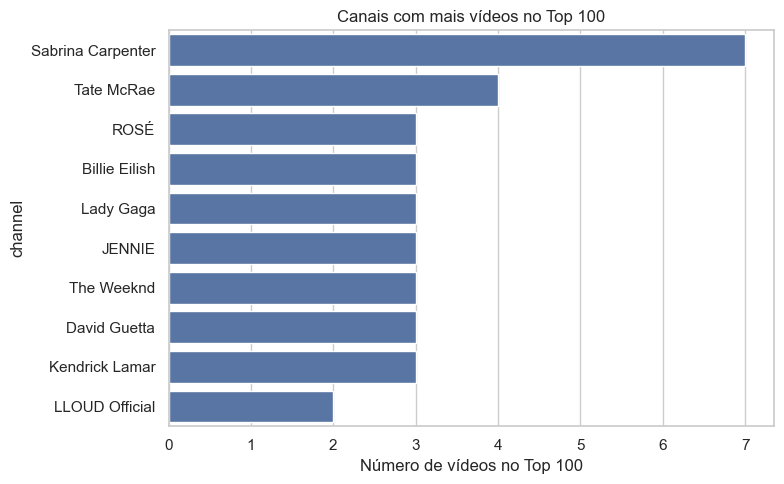

,Artista,Contagem
0,Sabrina Carpenter,7
1,Tate McRae,4
2,ROSÉ,3
3,Billie Eilish,3
4,Lady Gaga,3
5,JENNIE,3
6,The Weeknd,3
7,David Guetta,3
8,Kendrick Lamar,3
9,LLOUD Official,2


In [7]:
# Top canais por número de vídeos - ver quem aparece mais vezes

top_channels_count = df['channel'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_channels_count.values, y=top_channels_count.index)
plt.xlabel('Número de vídeos no Top 100')
plt.title('Canais com mais vídeos no Top 100')
plt.tight_layout()
plt.savefig('top_channels_count.png', dpi=150)
plt.show()

top_channels_count.reset_index().rename(columns={'count':'Contagem','channel':'Artista'})


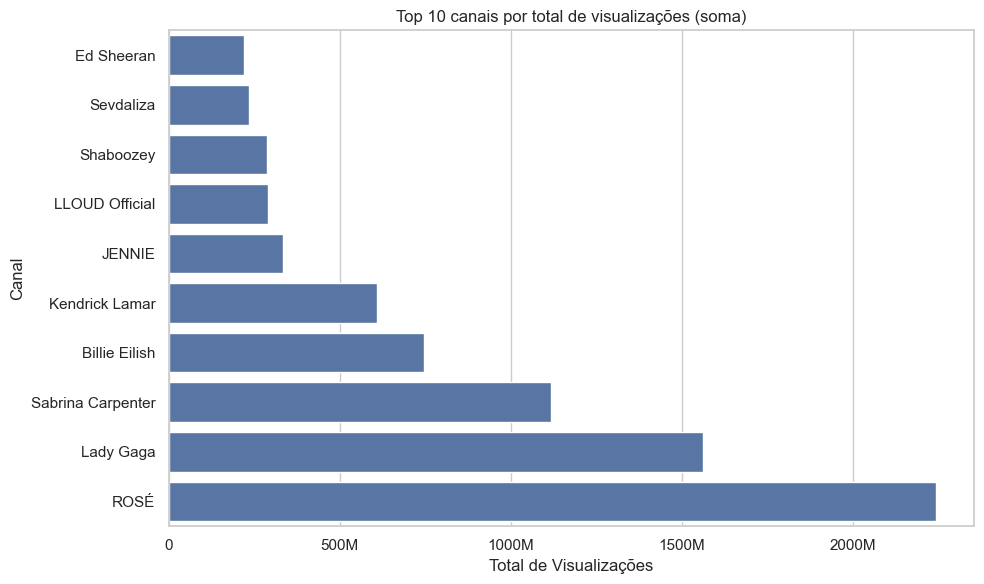

In [11]:
# Canais: total de views e média por vídeo comparando poder de audiência (soma vs média).

agg = df.groupby('channel').agg(
    n_videos = ('title','size'),
    total_views = ('view_count','sum'),
    mean_views = ('view_count','mean'),
    followers = ('channel_follower_count','max')
).reset_index()

top_by_total = agg.nlargest(10, 'total_views').sort_values('total_views')
top_by_total.rename(columns={'channel': 'Canal'}, inplace=True)
top_by_total.rename(columns={'total_views': 'Total de Visualizações'}, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Total de Visualizações', y='Canal', data=top_by_total)

plt.title('Top 10 canais por total de visualizações (soma)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x>=1e6 else f'{int(x/1e3)}K' if x>=1e3 else f'{int(x)}'))
plt.tight_layout()
plt.savefig('top_channels_total_views.png', dpi=150)



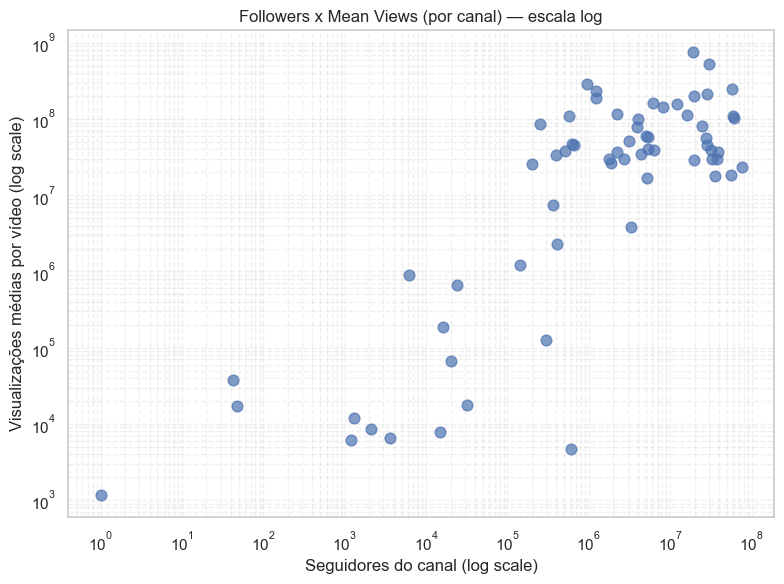

Correlação (Pearson) entre log(followers) e log(mean_views): 0.827


In [12]:
# Views vs Inscritos (followers) — dispersão com escala log - ver se mais inscritos = mais views (regra geral) e identificar outliers.

agg_plot = agg.copy()
agg_plot = agg_plot[agg_plot['followers']>0]

plt.figure(figsize=(8,6))
plt.scatter(agg_plot['followers'], agg_plot['mean_views'], s=60, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Seguidores do canal (log scale)')
plt.ylabel('Visualizações médias por vídeo (log scale)')
plt.title('Followers x Mean Views (por canal) — escala log')
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.savefig('followers_vs_meanviews.png', dpi=150)
plt.show()

# Correlação (Pearson) nos logs
corr = np.corrcoef(np.log1p(agg_plot['followers']), np.log1p(agg_plot['mean_views']))[0,1]
print("Correlação (Pearson) entre log(followers) e log(mean_views):", round(corr,3))


Interpretação: correlação próxima de 1 indica forte relação;

In [15]:
# Top 5 canais pequenos canais que bombaram - views por followers

agg['views_per_follower'] = agg['total_views'] / agg['followers'].replace(0, np.nan)
top_ppf = agg.sort_values('views_per_follower', ascending=False).head(5)
top_ppf[['channel','n_videos','total_views','followers','views_per_follower']]


,channel,n_videos,total_views,followers,views_per_follower
44,RyanCollinsVEVO,1,1161,1,1161.000000
46,SHOOP,1,37164,43,864.279070
35,NIICKII,1,17322,47,368.553191
61,keinemusik,1,87005996,255000,341.199984
51,Shaboozey,1,288277902,955000,301.861677


In [20]:
# Colaborações vs Solo comparando médias e testando diferença estatística.

print("Média views - solo:", int(df['view_count'].mean()))
print("Média views - collab:", int(df['view_count'].mean()))
print("Mediana views - solo:", int(df['view_count'].median()))
print("Mediana views - collab:", int(df['view_count'].median()))

# Teste estatístico (Mann-Whitney é robusto para distribuições assimétricas)
from scipy.stats import mannwhitneyu
u_stat, p_val = mannwhitneyu(df['view_count'], df['view_count'], alternative='two-sided')
print("Mann-Whitney U p-value:", p_val)

print()

if p_val < 0.05:
    print("Há evidência estatística de diferença.")
else:
    print("Não há evidência estatística de diferença.")

Média views - solo: 105910319
Média views - collab: 105910319
Mediana views - solo: 37982240
Mediana views - collab: 37982240
Mann-Whitney U p-value: 1.0

Não há evidência estatística de diferença.


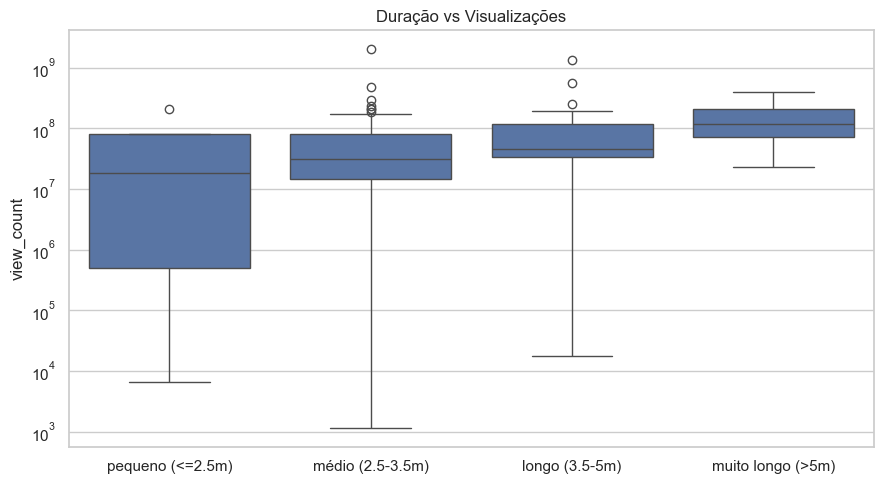

C:\Users\Usuário\AppData\Local\Temp\ipykernel_7468\2920149763.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('duration_bin')['view_count'].agg(['count','mean','median']).reset_index()


,duration_bin,count,mean,median
0,pequeno (<=2.5m),4,6.128537e+07,18404592.5
1,médio (2.5-3.5m),60,9.477157e+07,31258490.0
2,longo (3.5-5m),32,1.251184e+08,46128218.5
3,muito longo (>5m),4,1.639516e+08,117753759.5


In [34]:
# Duração x Views — análise por faixas, ver se existe “duração ideal”.
df['minutos'] = df['duration'] / 60

bins = [0, 2.5, 3.5, 5, 15] 
labels = ['pequeno (<=2.5m)','médio (2.5-3.5m)','longo (3.5-5m)','muito longo (>5m)']
df['duration_bin'] = pd.cut(df['minutos'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(9,5))
sns.boxplot(x='duration_bin', y='view_count', data=df)
plt.yscale('log') 
plt.title('Duração vs Visualizações')
plt.xlabel('')
plt.tight_layout()
plt.savefig('duration_vs_views_boxplot.png', dpi=150)
plt.show()

# Médias por bin
df.groupby('duration_bin')['view_count'].agg(['count','mean','median']).reset_index()


In [ ]:
# Resumo gerado pela bibliteca ydata-profiling - apenas para testar a ferramenta

profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]
